In [ ]:
import pandas as pd

In [2]:
df=pd.read_csv('Historical Product Demand.csv')

In [3]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [4]:
df = df.drop(columns=['Product_Code','Warehouse','Product_Category'])

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
print(df.columns)

Index(['Date', 'Order_Demand'], dtype='object')


In [11]:
df.head()

,Order_Demand
Date,
2012-07-27,100.0
2012-01-19,500.0
2012-02-03,500.0
2012-02-09,500.0
2012-03-02,500.0


In [8]:
df.set_index('Date',inplace=True)

In [10]:
df['Order_Demand'] = pd.to_numeric(df['Order_Demand'], errors='coerce')
df.dropna(inplace=True)

<Axes: xlabel='Date'>

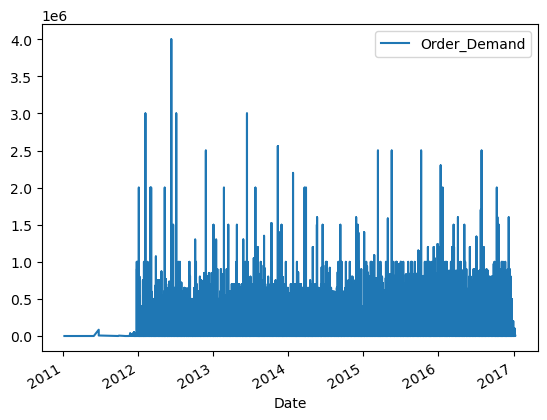

In [12]:
df.plot()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
df['Order_Demand'] = pd.to_numeric(df['Order_Demand'], errors='coerce')
df.dropna(inplace=True)

In [ ]:
test_result=adfuller(df['Order_Demand'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")